Olá 

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# O melhor lugar para um novo poço.

Você trabalha na empresa de mineração Oleobrás. Sua tarefa é encontrar o melhor lugar para um novo poço.

## Iniciação
Carregue bibliotecas que você acredita que são necessárias para o projeto. Você pode perceber depois que você precisa de bibliotecas adicionais conforme você avança, o que é totalmente normal - apenas certifique-se de atualizar essa seção quando perceber isso.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from scipy.stats  import bootstrap
from sklearn.metrics import mean_squared_error

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df_geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Explore os dados iniciais

- `id` - (identificador unívoco de poço de petróleo)
- `f0, f1, f2` - (três características de pontos (seu significado específico não é importante, mas as próprias características são significativas))
- `product` - (volume de reservas no poço de petróleo (milhares de barris)).

Agora vamos explorar nossos dados. Você vai querer ver quantas colunas e linhas ele tem, veja algumas linhas para verificar possíveis problemas com os dados.

In [3]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
df_geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [4]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
df_geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [5]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
df_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [6]:
# vamos exibir as primeiras 10 linhas
df_geo_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [7]:
# vamos exibir as primeiras 10 linhas
df_geo_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [8]:
# vamos exibir as primeiras 10 linhas
df_geo_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [9]:
# Verificar Valores Ausentes
df_geo_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
# Verificar Valores Ausentes
df_geo_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
# Verificar Valores Ausentes
df_geo_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [12]:
# Verificar Valores Duplicados
df_geo_0.duplicated().sum()

0

In [13]:
# Verificar Valores Duplicados
df_geo_1.duplicated().sum()

0

In [14]:
# Verificar Valores Duplicados
df_geo_2.duplicated().sum()

0

Podemos observar que não há dados faltantes ou duplicados.Está tudo coerente ao pré-procesamento de dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Treine e teste o modelo para cada região

### Divida os dados em um conjunto de treinamento e um conjunto de validação

###  Treine o modelo e faça predições para o conjunto de validação.

### Salve as predições e respostas corretas para o conjunto de validação.

In [15]:
data_all = [df_geo_0, df_geo_1, df_geo_2 ]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
#Criando listas para salvar os targets e as predições
samples_target = []
samples_predictions = []

for region in range(len(data_all)):
    data = data_all[region]
    features = data.drop(['product','id'], axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=123456)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    
    samples_target.append(target_valid.reset_index(drop=True))
    samples_predictions.append(pd.Series(predictions))

In [20]:
mean_product = target.mean()

In [21]:
mean_product

95.00000000000004

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Criamos um modelo de Regressão Linear para avaliar a volatividade dos valores de reservas de poços. 

### Imprima o volume médio predito de reservas e o REQM do modelo.

In [22]:
mean = []
rmse = []

for region in range(0,3):
    mean.append(samples_target[region].mean())
    rmse.append(mean_squared_error(samples_target[region], samples_predictions[region],squared=False))

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Voce pode iterar direto: for region in samples_target: daí naõ precisa indexar
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você usou MAE em vez de RMSE (REQM). No scikit, seria https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno:
    Corrigido</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [23]:
mean

[93.1898161393134, 69.02747842574298, 94.9781301255784]

In [24]:
rmse

[37.80046993478272, 0.8904933206270059, 39.98039278339241]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Podemos ver as médias de cada ponto do poços e o REQM. Quanto maior o erro quadrático médio, maior o afastamento entre o retorno do fundo e o retorno do benchmark. Quanto menor o erro quadrático médio, menor o afastamento entre o retorno do fundo e o retorno do benchmark.

### Analise os resultados.

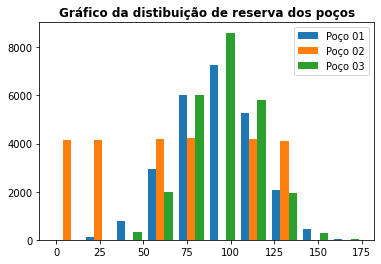

In [25]:
plt.hist(samples_predictions, 
         label = ['Poço 01','Poço 02','Poço 03']);
plt.legend(prop ={'size': 10})
plt.title('Gráfico da distibuição de reserva dos poços',
          fontweight ="bold")
  
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

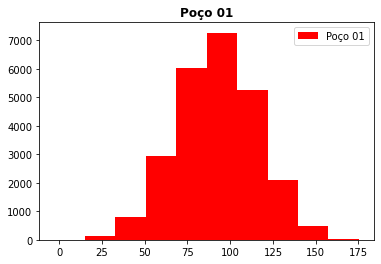

In [26]:
plt.hist(samples_predictions[0], 
         label = 'Poço 01', color ='red' );
plt.legend(prop ={'size': 10})
plt.title('Poço 01',
          fontweight ="bold")
  
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [27]:
samples_predictions[0].describe()

count    25000.000000
mean        92.492866
std         23.299327
min         -2.707394
25%         76.559516
50%         92.578063
75%        108.462626
max        175.267816
dtype: float64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

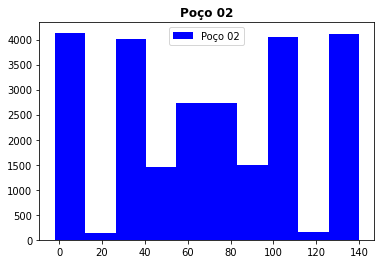

In [28]:
plt.hist(samples_predictions[1], 
         label = 'Poço 02', color = 'blue');
plt.legend(prop ={'size': 10})
plt.title('Poço 02',
          fontweight ="bold")
  
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [29]:
samples_predictions[1].describe()

count    25000.000000
mean        69.030554
std         45.914712
min         -2.062835
25%         28.588983
50%         79.811759
75%        109.348517
max        139.982924
dtype: float64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

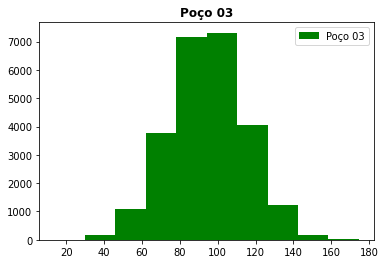

In [30]:
plt.hist(samples_predictions[2], 
         label = 'Poço 03', color = 'green');
plt.legend(prop ={'size': 10})
plt.title('Poço 03',
          fontweight ="bold")
  
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [31]:
samples_predictions[2].describe()

count    25000.000000
mean        94.848357
std         19.893166
min         13.798107
25%         81.356632
50%         94.798383
75%        108.328394
max        174.636585
dtype: float64

Vemos que os valores preditos dos poços 01,03 são bem volateis enquanto o do poço 02 tem mais instabilidade.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Calculando o Lucro


In [32]:
# Apenas regressão linear pode ser usada para o treinamento do modelo (o resto não são previsíveis o suficiente).
# Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.
# O orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.
# Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).
# Depois de ter avaliado os riscos, mantenha apenas as regiões com o risco de perdas inferior a 2.5%. Entre aquelas que se enquadram no critério, você precisa selecionar a região com o lucro médio mais alto.

### Armazene todos os valores necessários para os cálculos em variáveis separadas.

### Calcule o volume de reservas suficiente para desenvolver um novo poço sem prejuizos. Compare o valor recebido com o valor médio de reservas em cada região.

In [33]:
budget = 1000000
pit = 5000 
cost_pit_budget = budget//pit
price = 45

In [34]:
cost_pit = budget/cost_pit_budget
zero_loss = cost_pit/price

In [35]:
zero_loss

111.11111111111111

In [36]:
#função do lucro
def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:cost_pit_budget]
    product = selected_points.sum()
    revenue = product*price
    cost = budget
    return revenue - cost

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [37]:
profit(samples_target[0],samples_predictions[0])

349118.69017630955

In [38]:
profit(samples_target[1],samples_predictions[1])

241508.66966815107

In [39]:
profit(samples_target[2],samples_predictions[2])

240506.16903170897

O volume de reservas para desenvolver um novo poço sem que haja prejuizo é de R$111.11 aproximadamente.

Podemos ver os lucros para cada região sendo a região 01 se destacando, as demais com menores lucros, em destaque para a região (indice 2) apresenta menor lucro.

<s><div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Me parece que a última região (indice 2) apresentar menor lucro
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Escreva uma função para calcular lucro de um conjunto de poços de petróleo selecionados e predições do modelo:

### Escolha os poços com os valores mais altos de predições.

### Sumarize o volume alvo de reservas de acordo com essas predições.

### Apresente suas conclusões: sugira uma região para o desenvolvimento de poços de petróleo e justifique sua escolha. Calcule o lucro para o volume de reservas recebido.

## Calcule riscos e lucro para cada região:

### Utilize a técnica de bootstrapping com 1000 amostras para encontrar a distribuição de lucros.

### Encontre lucro médio, intervalo de confiança de 95% e risco de prejuízo. Prejuízo é um lucro negativo, calcule-o como uma probabilidade e depois o expresse como uma porcentagem.

In [40]:
sample_size = 500
bootstrap = 1000

state = np.random.RandomState(123456)

In [41]:
for region in range(3):
    target_0 = samples_target[region]
    predictions_0 = samples_predictions[region]
    values = []
    for i in range(bootstrap):
        target_subsample = target_0.sample(n=sample_size, replace=True, random_state=state)
        probs_subsample = predictions_0[target_subsample.index]

        values.append(profit(target_subsample, probs_subsample))

    values = pd.Series(values)
    lower = values.quantile(0.01)
    confidenial_interval = (values.quantile(0.025), values.quantile(0.975))
    negative_profit_chance = (values < 0).mean()
    mean_profit = values.mean()
    print("Região", region)
    print("Média da amostra =", mean_profit)
    print("95% intervalo confidencial", confidenial_interval)
    print("Risco de Perdas = ", negative_profit_chance*100,"%")
    print()

Região 0
Média da amostra = 51498.242641315504
95% intervalo confidencial (1121.5333057253174, 105479.06779972691)
Risco de Perdas =  2.5 %

Região 1
Média da amostra = 50701.41992626898
95% intervalo confidencial (7862.926920003483, 93221.46844675804)
Risco de Perdas =  0.7000000000000001 %

Região 2
Média da amostra = 38670.938179043194
95% intervalo confidencial (-13637.598691764946, 90268.8671799549)
Risco de Perdas =  6.7 %



Podemos que ver que a Região 1(Poço 02) é o poço onde poço onde os riscos são menores.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## conclusão

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos, e sklearn para criação do nosso modelo.

Verificamos se realmente o pre-processamento foi feito, para que não tivesse acontecido algum problema na criação do nosso modelo.

E desenvolvemos um modelo para recomedação, e usamos Regressão Linear para descobrir o melhor lugar para um novo poço, calculamos a receita de cada região, usamos a técnica de bootstrap para recolher amostras aleátorias.E concluimos que a Região 1(Poço 02) é a melhor escolha para construir um novo poço com base no menor risco para a receita.

<s>
<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.
    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Você usou o erro absoluto em vez do REQM </span>

Portanto, sugiro que você corrija os pontos indicados e garantir que entende a diferença entre MAE e MSE.
    
Bom trabalho.
</div>


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>


Bom trabalho. Você finalizou mais um projeto. Desejo sucesso na jornada.
</div>